In this notebook, you will learn how to make your first submission to the **[Tabular Playground Series - Jan 2021](https://admin.kaggle.com/c/tabular-playground-series-jan-2021/overview)** competition. 

# Make the most of this notebook!

You can use the "Copy and Edit" button in the upper right of the page to create your own copy of this notebook and experiment with different models. You can run it as-is and then see if you can make improvements.

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
        
#input_path = Path('/kaggle/input/tabular-playground-series-jan-2021/')

# Read in the data files

In [2]:
train = pd.read_csv('train.csv', index_col='id')
display(train.head())

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
id,,,,,,,,,,,,,,,
1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [3]:
test = pd.read_csv('test.csv', index_col='id')
display(test.head())

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
id,,,,,,,,,,,,,,
0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275


In [4]:
submission = pd.read_csv('sample_submission.csv', index_col='id')
display(submission.head())

,target
id,
0,0.5
2,0.5
6,0.5
7,0.5
10,0.5


## Pull out the target, and make a validation split

In [5]:
target = train.pop('target')
X_train, X_test, y_train, y_test = train_test_split(train, target, train_size=0.60)

# How well can we do with a completely naive model?

We'll want any of our models to do (hopefully much!) better than this.

In [6]:
# Let's get a benchmark score
model_dummy = DummyRegressor(strategy='median')
model_dummy.fit(X_train, y_train)
y_dummy = model_dummy.predict(X_test)
score_dummy = mean_squared_error(y_test, y_dummy, squared=False)
print(f'{score_dummy:0.5f}') # 0.54118

0.73289


# Simple Linear Regression

A simple linear regression doesn't do better than our dummy regressor!

In [7]:
# Simple Linear Regression
model_simple_linear = LinearRegression(fit_intercept=False) # data is not centered, don't fit intercept
model_simple_linear.fit(X_train, y_train)
y_simple_linear = model_simple_linear.predict(X_test)
score_simple_linear = mean_squared_error(y_test, y_simple_linear, squared=False)
print(f'{score_simple_linear:0.5f}')

1.33136


# This seems slow and repetitive. Can we automate it a bit?

In [8]:
def plot_results(name, y, yhat, num_to_plot=10000, lims=(0,12), figsize=(6,6)):
    plt.figure(figsize=figsize)
    score = mean_squared_error(y, yhat, squared=False)
    plt.scatter(y[:num_to_plot], yhat[:num_to_plot])
    plt.plot(lims, lims)
    plt.ylim(lims)
    plt.xlim(lims)
    plt.title(f'{name}: {score:0.5f}', fontsize=18)
    plt.show()

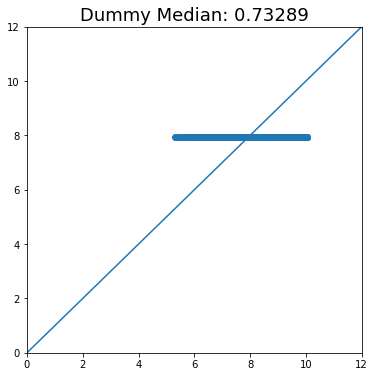

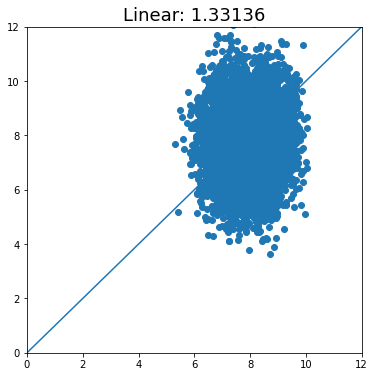

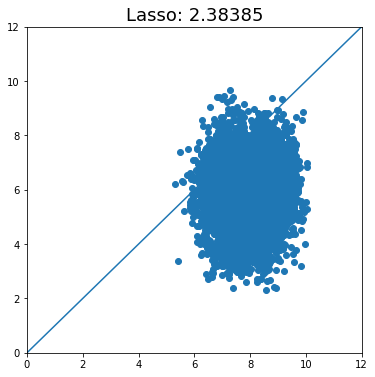

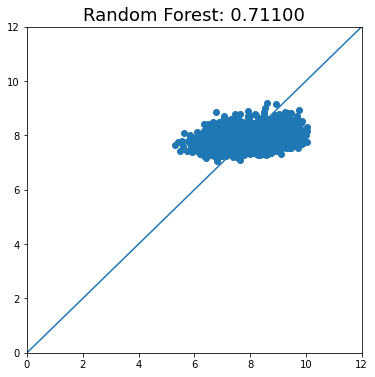

In [9]:
model_names = ["Dummy Median", "Linear",  "Lasso", "Random Forest"]

models = [
    DummyRegressor(strategy='median'),
    LinearRegression(fit_intercept=False),
    Lasso(fit_intercept=False),
    RandomForestRegressor(n_estimators=50, n_jobs=-1)]

for name, model in zip(model_names, models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_results(name, y_test, y_pred)

# It look like RandomForest did the best. Let's train it on all the data and make a submission!

In [10]:
model = RandomForestRegressor(n_estimators=50, n_jobs=-1)
model.fit(train, target)
submission['target'] = model.predict(test)
submission.to_csv('random_forest.csv')

# It's time to make a submission to the competition. :-)

Click on the **"Save Version"** button in the top right corner of your notebook.  This will generate a pop-up window.  
- Click on the **"Save"** button.
- This generates a window in the bottom left corner of the notebook.  After it has finished running, click on the number to the right of the **"Save Version"** button.  This pulls up a list of versions on the right of the screen.  Click on the ellipsis **(...)** to the right of the most recent version, and select **Open in Viewer**.  
- Click on the **Output** tab on the right of the screen.  Then, click on the **"Submit"** button to submit your results.

Once your file is successfully submitted, you should receive a message saying that you've moved up the leaderboard.  Great work!

# There's lots of room for improvement. What things can you try to get a better score?

Let's try and add more estimators to the RandomForestRegressor to see if there is any improvement.

In [11]:
ranForest_model2 = RandomForestRegressor(n_estimators=100, n_jobs=-1)
ranForest_model2.fit(train, target)
submission['target'] = ranForest_model2.predict(test)
submission.to_csv('random_forest2.csv')

In [12]:
from sklearn.ensemble import ExtraTreesRegressor

In [13]:
exTreeReg = ExtraTreesRegressor(n_estimators=100, n_jobs=-1, max_depth=2)

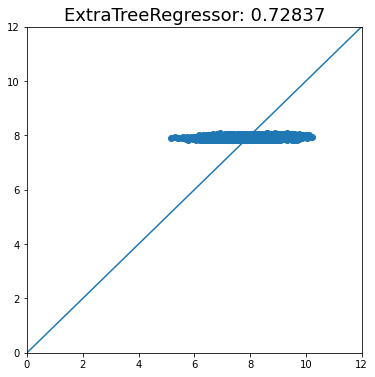

In [14]:
exTreeReg.fit(X_train, y_train)
y_pred = exTreeReg.predict(X_test)
plot_results("ExtraTreeRegressor", y_test, y_pred)

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=0.95)

In [12]:
X_train_pca = pca.fit_transform(X_train)

In [13]:
X_train_pca.shape

(180000, 11)

In [14]:
X_test_pca = pca.fit_transform(X_test)

In [15]:
ranForest_model2 = RandomForestRegressor(n_estimators=100, n_jobs=-1)

In [16]:
ranForest_model2.fit(X_train_pca, y_train)

RandomForestRegressor(n_jobs=-1)

In [18]:
y_pred = ranForest_model2.predict(X_test_pca)

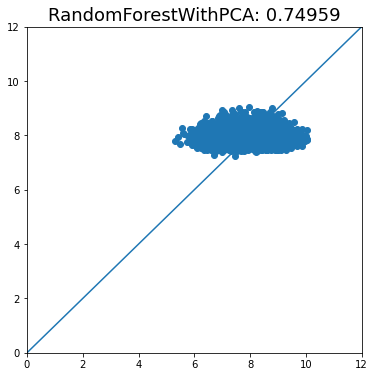

In [19]:
plot_results("RandomForestWithPCA", y_test, y_pred)

In [20]:
ridge = Ridge(fit_intercept=False)

In [21]:
ridge.fit(X_train, y_train)

Ridge(fit_intercept=False)

In [22]:
y_pred = ridge.predict(X_test)

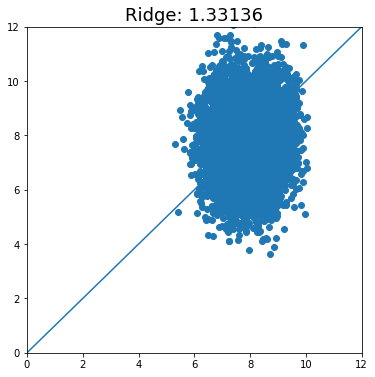

In [23]:
plot_results("Ridge", y_test, y_pred)

In [24]:
from xgboost import XGBRegressor

In [25]:
xgbRegressor = XGBRegressor()

In [26]:
xgbRegressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
y_pred = xgbRegressor.predict(X_test)

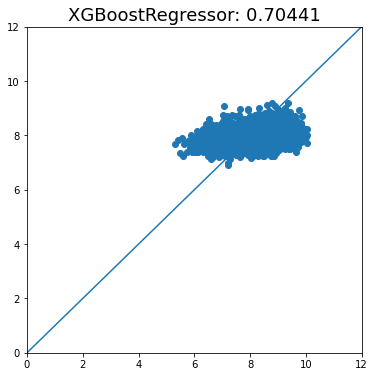

In [28]:
plot_results("XGBoostRegressor", y_test, y_pred)

In [29]:
ranForest_model3 = RandomForestRegressor(n_estimators=100, n_jobs=-1)
ranForest_model3.fit(X_train, y_train)

AttributeError: 'RandomForestRegressor' object has no attribute 'predist'

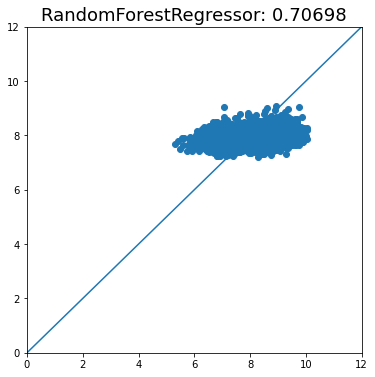

In [30]:
y_pred = ranForest_model3.predict(X_test)
plot_results("RandomForestRegressor", y_test, y_pred)

In [31]:
xgbRegressor.fit(train, target)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
submission['target'] = xgbRegressor.predict(test)
submission.to_csv('xgbRegressor.csv')